# Assignment 5 (Oct 19)

Today we will learn to import data into Python, manipulate 2D tabular data (think spreadsheets) with `pandas`, and save our data to text files like CSV (comma-separated values).

Outline:

1. Intro to `pandas`
2. Data I/O
3. Manipulating and plotting with `pandas`

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

- [SPIRL Ch. 4.5 Pandas](https://cjtu.github.io/spirl/sp_pandas.html)
- [Python for Data Science pandas tutorials](https://wavedatalab.github.io/datawithpython/)

Below we have our regular imports, but this time with `pandas` which most people alias to `pd`. The Pandas package is included with Anaconda, so you shouldn't need to install anything.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Intro to Pandas

[Pandas](https://pandas.pydata.org/) is a package at the heart of most data analysis tasks with Python. It is quick at opening, selecting, manipulating and plotting 2D data with columns and rows (like tables and spreadsheets) which pandas calls **DataFrames**.

Below we make a simple `pandas.DataFrame` to see what Pandas can do. One way to make a DataFrame is with two zipped lists, which we saw when making dictionaries in assignment 2.

In [2]:
fruit = ['apples', 'oranges', 'pears', 'bananas', 'kiwis', 'cherries']
count = [142, 119, 248, 84, 41, 187]
inventory = list(zip(fruit, count))
print(inventory)

[('apples', 142), ('oranges', 119), ('pears', 248), ('bananas', 84), ('kiwis', 41), ('cherries', 187)]


To turn this into a Pandas **DataFrame**, we call `pd.DataFrame` and specify the `data` as our zipped lists and also the `columns` names in order.

In [3]:
df = pd.DataFrame(data=inventory, columns=['Fruit', 'Count'])
print('df is type: ', type(df))
df

df is type:  <class 'pandas.core.frame.DataFrame'>


,Fruit,Count
0,apples,142
1,oranges,119
2,pears,248
3,bananas,84
4,kiwis,41
5,cherries,187


Now we see we have a table version of our inventory data with named columns, "Fruit", and "Count". Let's see what we can learn about these data.

In [4]:
df.head()  # show first 5 rows

,Fruit,Count
0,apples,142
1,oranges,119
2,pears,248
3,bananas,84
4,kiwis,41


In [5]:
df.head(6)  # show first n rows

,Fruit,Count
0,apples,142
1,oranges,119
2,pears,248
3,bananas,84
4,kiwis,41
5,cherries,187


In [6]:
len(df)  # number of rows

6

In [7]:
print(df.columns)  # column names
print(list(df.columns))  # as a normal list

Index(['Fruit', 'Count'], dtype='object')
['Fruit', 'Count']


In [8]:
df.dtypes  # see data types for each column

Fruit    object
Count     int64
dtype: object

Each column in a DataFrame is assigned a type. We can change the type of a column with `.astype`. This is sometimes needed to ensure that you are working with numerical data, dates, etc.

In [9]:
df = df.astype({"Fruit": str, "Count": float})
df.dtypes

Fruit     object
Count    float64
dtype: object

A quirk of pandas is that it doesn't recognize the `str` type. All we need to do is spell out `"string"` in this case.

In [10]:
df = df.astype({"Fruit": "string", "Count": float})
df.dtypes

Fruit     string
Count    float64
dtype: object

## Data I/O: Importing a CSV

Data I/O (in/out) operations are an essential and often tedious part of analyzing scientific data. Pandas offers some help and can read simple structured data files with little trouble. These are mainly through the `pd.read_` functions listed [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), some of which include:

- CSV: `pd.read_csv()`
- Fixed-width: `pd.read_fwf()`
- Excel: `pd.read_excel()`
- and more...

Here we read in a **CSV** from a public URL. You can also read in CSVs on your local computer by passing in the path.

In [11]:
csv_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv"
df = pd.read_csv(csv_url)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


It seems this CSV was imported with a bunch of empty columns. We can cut those off after importing, or adjust our `read_csv` to only include certain columns. This can be done by giving a list of indices to the `usecols` argument, but a range works just as well. Here we want the first 9 columns, meaning `range(0, 9)` in Python.

In [12]:
csv_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv"
df = pd.read_csv(csv_url, usecols=range(0, 9))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


The pandas `read_csv` can also read in other character delimited file formats, e.g. space or tab-separated (TSV) files. All we need to do is change the delimiter. Ex.

`df = pd.read_csv(f, delimiter='\t')`  # Tab-separated values

`df = pd.read_csv(f, delimiter='\s+')`  # Whitespace separated

## Selecting data with Pandas

Pandas offers several ways to access and filter data in DataFrames. The most basic are `[]`, `.loc[]` and `.iloc[]`.

### Selecting with square brackets `[]` and dot `.`

Selecting with square brackets `[]` gives us the column that we specify.

In [13]:
df['car']  # Select a column by its name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
193                ford maverick
194                   amc hornet
195           chevrolet chevette
196              chevrolet woody
197                    vw rabbit
Name: car, Length: 198, dtype: object

Alternatively, we can access DataFrame columns with `.columnname`.

In [14]:
df.car

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
193                ford maverick
194                   amc hornet
195           chevrolet chevette
196              chevrolet woody
197                    vw rabbit
Name: car, Length: 198, dtype: object

There is no major difference between the two methods, it's a matter of personal preference. The dot (`.`) version is less typing, but is harder to use when you have your column name stored as a variable, for example:

In [15]:
col = 'mpg'
df[col]  # This works!
# df.col  # This doesn't! AttributeError since "col" is not a column name

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
193    24.0
194    22.5
195    29.0
196    24.5
197    29.0
Name: mpg, Length: 198, dtype: float64

### Selecting with `.loc[]`

We can also select labelled columns or rows in our DataFrames with `.loc[]`.

In [ ]:
df.loc['car']
# KeyError

While DataFrame `.loc[]` allows us to select by the row name and column name, we have to do it in the proper order `[rows, columns]`. To select the `car` columns, we can use the `:` as a placeholder meaning "all rows".

In [17]:
df.loc[:, 'car']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
193                ford maverick
194                   amc hornet
195           chevrolet chevette
196              chevrolet woody
197                    vw rabbit
Name: car, Length: 198, dtype: object

So now we know `df['car']` is equivalent to `df.loc[:, 'car']`. We can also select named **rows** of data by their `Index`. Right now our rows are just numbered, but a DataFrame Index could have any unique label (usually `int` or `str`).

In [18]:
df.loc[0]  # First row of data

mpg                                  18.0
cylinders                               8
displacement                          307
horsepower                            130
weight                               3504
acceleration                         12.0
model                                  70
origin                                  1
car             chevrolet chevelle malibu
Name: 0, dtype: object

We can also select a single cell of data by specifying the row and column.

In [19]:
df.loc[11, 'car']  # The car in row 11

"plymouth 'cuda 340"

In [20]:
df.loc[29, 'weight']  # The weight in row 29

2130

We can also select multiple `Index` or `columns` by passing a list to `.loc[]`.

In [21]:
df.loc[1, ['car', 'horsepower', 'cylinders']]

car           buick skylark 320
horsepower                  165
cylinders                     8
Name: 1, dtype: object

In [22]:
df.loc[range(12, 17), 'car']

12      chevrolet monte carlo
13    buick estate wagon (sw)
14      toyota corona mark ii
15            plymouth duster
16                 amc hornet
Name: car, dtype: object

If we select along one row or column, we get a 1D slice of our DataFrame. We can also select multiple indices and columns to get a smaller DataFrame. The result keeps the same order as the rows and columns we specify.

In [23]:
df.loc[[3, 2, 7, 1], ['car', 'cylinders', 'horsepower']]

,car,cylinders,horsepower
3,amc rebel sst,8,150
2,plymouth satellite,8,150
7,plymouth fury iii,8,215
1,buick skylark 320,8,165


A common task is to make a subset of our DataFrame with only the columns we need. We can do this easily with `.loc[]`.

In [24]:
sub_df = df.loc[:, ['car', 'cylinders', 'horsepower', 'weight', 'mpg', 'acceleration']]
sub_df.head()

,car,cylinders,horsepower,weight,mpg,acceleration
0,chevrolet chevelle malibu,8,130,3504,18.0,12.0
1,buick skylark 320,8,165,3693,15.0,11.5
2,plymouth satellite,8,150,3436,18.0,11.0
3,amc rebel sst,8,150,3433,16.0,12.0
4,ford torino,8,140,3449,17.0,10.5


One limitation of `.loc[]` is that we can't select a range of `str`, in this case our columns. We can choose a range of columns with `.iloc[]` instead. 

In [ ]:
sub_df = df.loc[:, range(4)]
# KeyError

### Selecting with `.iloc[]`

With `.iloc[]`, we can select data by the numbered `Index` or `columns`.

In [26]:
sub_df = df.iloc[:, range(4)]
sub_df.head()

,mpg,cylinders,displacement,horsepower
0,18.0,8,307,130
1,15.0,8,350,165
2,18.0,8,318,150
3,16.0,8,304,150
4,17.0,8,302,140


So in pandas, both the order of the rows and columns and their labels are important! We can select by labels using `.loc` and by integer index order using `.iloc`.

In [27]:
df2 = df.loc[[3, 2, 7, 1], ['car', 'cylinders', 'horsepower']]
df2.head()

,car,cylinders,horsepower
3,amc rebel sst,8,150
2,plymouth satellite,8,150
7,plymouth fury iii,8,215
1,buick skylark 320,8,165


In [28]:
sub_df.iloc[:, 0]  # mpg was 1st column

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
193    24.0
194    22.5
195    29.0
196    24.5
197    29.0
Name: mpg, Length: 198, dtype: float64

In [29]:
df2.iloc[:, 0]  # car is 1st column

3         amc rebel sst
2    plymouth satellite
7     plymouth fury iii
1     buick skylark 320
Name: car, dtype: object

### Setting a new index in pandas

We can choose a column of unique values to be our new `pandas` index. Here, let's use the car names.

In [30]:
df2 = df.set_index('car')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
car,,,,,,,,
chevrolet chevelle malibu,18.0,8,307,130,3504,12.0,70,1
buick skylark 320,15.0,8,350,165,3693,11.5,70,1
plymouth satellite,18.0,8,318,150,3436,11.0,70,1
amc rebel sst,16.0,8,304,150,3433,12.0,70,1
ford torino,17.0,8,302,140,3449,10.5,70,1


Now we can select certain rows by the car name using `.loc`.

In [31]:
df2.loc['amc rebel sst']

mpg             16.0
cylinders          8
displacement     304
horsepower       150
weight          3433
acceleration    12.0
model             70
origin             1
Name: amc rebel sst, dtype: object

Be careful when working with a numerical `Index()`. You can run into confusing situations where the index associated with your rows is not in the same order as your rows. Recall the earlier example

In [32]:
df3 = df.loc[[3, 2, 7, 1], ['car', 'cylinders', 'horsepower']]
df3.head()

,car,cylinders,horsepower
3,amc rebel sst,8,150
2,plymouth satellite,8,150
7,plymouth fury iii,8,215
1,buick skylark 320,8,165


Here, our `Index` has the numbers `[3, 2, 7, 1]`, in that order as we can see with the `.index`.

In [33]:
df3.index

Int64Index([3, 2, 7, 1], dtype='int64')

This means we can select any values in our index with `.loc`, or any *row* number from 0 to 3 with `.iloc`.

In [34]:
print(df3.loc[7])  # Index 7
print(df3.iloc[2])  # Row 3

car           plymouth fury iii
cylinders                     8
horsepower                  215
Name: 7, dtype: object
car           plymouth fury iii
cylinders                     8
horsepower                  215
Name: 7, dtype: object


But here we need to be careful because we can pick the 1st row with `.iloc[0]`, but there is no row with index `0` (remember our only indices are `[3, 2, 7, 1]`).

In [35]:
print(df3.iloc[0])
# print(df3.loc[0])  # KeyError

car           amc rebel sst
cylinders                 8
horsepower              150
Name: 3, dtype: object


If the numerical `Index` assigned by pandas doesn't matter and we don't want this situation where there are gaps or different orders of our rows, we can call `.reset_index(drop=True)`. This will renumber our DataFrame rows starting from 0.

In [36]:
df3.head()

,car,cylinders,horsepower
3,amc rebel sst,8,150
2,plymouth satellite,8,150
7,plymouth fury iii,8,215
1,buick skylark 320,8,165


In [37]:
df4 = df3.reset_index(drop=True)
df4.head()

,car,cylinders,horsepower
0,amc rebel sst,8,150
1,plymouth satellite,8,150
2,plymouth fury iii,8,215
3,buick skylark 320,8,165


### Summary: Selecting from DataFrames

Keep in mind:

- `['colname']` or `.colname` selects columns
- `.loc[]` selects by a **label** (i.e., a value in `df.index` or `df.columns`)
- `.iloc[]` selects by a numbered index in row / column order, starting at 0

## Adding a new column

We can add columns to a DataFrame with `DataFrame['col'] = values`. We need to make sure the new values are the same number of rows as the DataFrame. An easy way to do this is to derive columns from existing DataFrame columns.

In [38]:
# Convert miles per gallons to liters per 100 km
df['lp100km'] = round(235.214583 / df['mpg'], 2)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,13.07
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,15.68
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,13.07
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,14.70
4,17.0,8,302,140,3449,10.5,70,1,ford torino,13.84


## Saving to a file

It's nice to manipulate and plot our data in Python, but we often want to save the results of our efforts for later.

The simplest way to do so is with pandas `.to_csv`. Pandas saves the `Index` by default, but since we just have default indices, you can just omit the index from the csv with `index=False`.

In [39]:
fname = '/full/path/to/cars.csv'  # <- change to real path
# df.to_csv(fname, index=False)  # <- uncomment to save to file

## Other useful DataFrame methods

In [40]:
df.tail()  # last 5 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,9.80
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,10.45
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,8.11
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,9.60
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,8.11


In [41]:
df.describe()  # summary statistics on each numerical column

,mpg,cylinders,displacement,weight,acceleration,model,origin,lp100km
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,13.029293
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,3.924258
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,6.720000
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,9.650000
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,12.380000
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,15.680000
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,26.130000


In [42]:
fruit = ['apples', 'apples', 'pears', 'bananas', 'kiwis', 'cherries']
count = [142, 142, 248, 84, None, 187]
fruit_df = pd.DataFrame(zip(fruit, count), columns=['Fruit', 'Count'])
fruit_df.head()

,Fruit,Count
0,apples,142.0
1,apples,142.0
2,pears,248.0
3,bananas,84.0
4,kiwis,NaN


In [43]:
fruit_df = fruit_df.fillna(0)  # fill missing values with 0
fruit_df.head()

,Fruit,Count
0,apples,142.0
1,apples,142.0
2,pears,248.0
3,bananas,84.0
4,kiwis,0.0


In [44]:
fruit_df = fruit_df.drop_duplicates()
fruit_df.head()

,Fruit,Count
0,apples,142.0
2,pears,248.0
3,bananas,84.0
4,kiwis,0.0
5,cherries,187.0


## Filtering DataFrames

We often want to select data within a certain range or on a specific condition. There are a couple ways to do this. The simplest (but slowest and most error-prone) way is to use a loop.

Say we want to select only cars with 4 cylinders. Here we use `df.iterrows()` which will return the `Index` of the row and the row itself on each iteration in the loop.

In [45]:
cars_4cyl = []
for i, row in df.iterrows():
    if row['cylinders'] == 4:
        cars_4cyl.append(row['car'])
print(cars_4cyl[:5])

['toyota corona mark ii', 'datsun pl510', 'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls']


Now we have a list of 4 cylinder cars, but we've lost all other information stored about them in the DataFrame. We would need to make a separate list for each column we want to store. 

Instead of using a loop, we can do the **vectorized** solution which keeps our data in a DataFrame and selects info based on our condition (`row['cylinders'] == 4`).

In [46]:
df_4cyl = df[df.cylinders == 4]
#  df_4cyl = df[df['cylinders'] == 4]  # Equivalent to the above
print('Max cylinders in DataFrame', df_4cyl.cylinders.max())
df_4cyl.head()

Max cylinders in DataFrame 4


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
14,24.0,4,113,95,2372,15.0,70,3,toyota corona mark ii,9.80
18,27.0,4,97,88,2130,14.5,70,3,datsun pl510,8.71
19,26.0,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,9.05
20,25.0,4,110,87,2672,17.5,70,2,peugeot 504,9.41
21,24.0,4,107,90,2430,14.5,70,2,audi 100 ls,9.80


To break down what we are doing here, we can look at what `df.cylinders == 4` gives us.

In [47]:
df.cylinders == 4

0      False
1      False
2      False
3      False
4      False
       ...  
193    False
194    False
195     True
196     True
197     True
Name: cylinders, Length: 198, dtype: bool

This is a **boolean index**, meaning it will be `True` or `False` based on the condition we supplied (whether there are 4 cylinders or not). 

When we pass a boolean index to a DataFrame in square brackets (`[]`), it's similar to supplying specific labels or indices as we learned above. The only difference is it will select only the rows in the DataFrame that have `True`, e.g. rows where the car has 4 cylinders.

We can supply conditions with any of the comparison operators (`==`, `<`, `<=`, `>`, `>=`). Say we want to find cars that get the fewest miles per gallon (mpg < 12):

In [48]:
df[df.mpg < 12]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
25,10.0,8,360,215,4615,14.0,70,1,ford f250,23.52
26,10.0,8,307,200,4376,15.0,70,1,chevy c20,23.52
27,11.0,8,318,210,4382,13.5,70,1,dodge d200,21.38
28,9.0,8,304,193,4732,18.5,70,1,hi 1200d,26.13
67,11.0,8,429,208,4633,11.0,72,1,mercury marquis,21.38
103,11.0,8,400,150,4997,14.0,73,1,chevrolet impala,21.38
124,11.0,8,350,180,3664,11.0,73,1,oldsmobile omega,21.38


We can also string conditions together by separating them with parentheses (`()`) and the **union** `&` or **intersection** `|` operators.

- Union (`&`): select where condition1 AND condition2 are `True`
- Intersection (`|`): select where condition1 OR condition2 are `True`

In [49]:
light_high_accel = df[(df.weight < 2000) & (df.acceleration > 20)]
light_high_accel.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
19,26.0,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,9.05
56,26.0,4,91,70,1955,20.5,71,1,plymouth cricket,9.05
102,26.0,4,97,46,1950,21.0,73,2,volkswagen super beetle,9.05
131,32.0,4,71,65,1836,21.0,74,3,toyota corolla 1200,7.35


In [50]:
heavy_or_8cyl = df[(df.weight > 3000) | (df.cylinders == 8)]
heavy_or_8cyl.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
190,14.5,8,351,152,4215,12.8,76,1,ford gran torino,16.22
191,22.0,6,225,100,3233,15.4,76,1,plymouth valiant,10.69
192,22.0,6,250,105,3353,14.5,76,1,chevrolet nova,10.69
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,9.80
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,10.45


Finally, we can take the opposite of a comparison with a preceding **negation** operator (`~`).

In [51]:
# Use str.contains to match a sub-string
ford_cars = df[df.car.str.contains('ford')]
ford_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
4,17.0,8,302,140,3449,10.5,70,1,ford torino,13.84
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500,15.68
17,21.0,6,200,85,2587,16.0,70,1,ford maverick,11.20
25,10.0,8,360,215,4615,14.0,70,1,ford f250,23.52
32,25.0,4,98,?,2046,19.0,71,1,ford pinto,9.41


In [52]:
high_accel_not_ford = df[(df.acceleration > 15) & ~df.car.str.contains('ford')]
high_accel_not_ford.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,lp100km
15,22.0,6,198,95,2833,15.5,70,1,plymouth duster,10.69
16,18.0,6,199,97,2774,15.5,70,1,amc hornet,13.07
19,26.0,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,9.05
20,25.0,4,110,87,2672,17.5,70,2,peugeot 504,9.41
22,25.0,4,104,95,2375,17.5,70,2,saab 99e,9.41


## Plotting with DataFrame.plot

Pandas gives you a convenient interface into plotting with the `.plot` method. It even labels your axes for you!

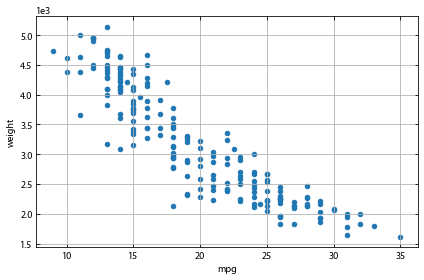

In [53]:
ax = df.plot(x='mpg', y='weight', kind='scatter')
plt.show()

Of course, we can customize our subplot with the `ax` object it returned, as usual.

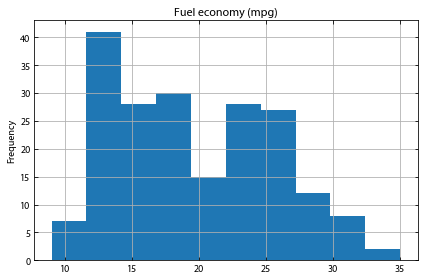

In [54]:
ax = df.mpg.plot(kind='hist')
ax.set_title('Fuel economy (mpg)')
plt.show()

## [Assignment 1] 

In this assignment, you will practice reading in several datasets of different formats.

### 1a) CSV (comma-separated)

We can read in CSV files like above with `pd.read_csv`. Try it on [a5data.csv](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data.csv) in the cell provided below (either go to the link and copy the url or right-click then copy link url to use in `pd.read_csv`).


### 1b) TSV (tab-separated)

To read in TSV files, we can also use `pd.read_csv` with the `delimiter='\t'` argument. Try it on [a5data.tsv](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data.tsv) in the cell provided below.


### 1c) Excel (.xls, .xlsx)

To read in Excel files, we use `pd.read_excel`. Try it on [a5data.xlsx](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data.xlsx) in the cell provided below.


### 1d) ASCII text file

To read in text files with entries separated by some amount of whitespace (tabs, spaces, etc), we can use `pd.read_csv` with the `delimiter='\s+'` argument. Try it on [a5data.txt](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data.txt) in the cell provided below.


### 1e) ASCII text file with header rows

To have pandas skip rows while importing, we can use the `skiprows` argument of `pd.read_csv`. Try it on [a5data_headers.txt](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data_headers.txt) in the space provided below.


### 1f) BONUS: FITS table file

(Optional): For this question, you will need to read in tabular data in a `.fits` file (not image data) with `astropy.table.Table()` and convert it to a `pd.DataFrame` with the `.to_pandas()` method. You will need the following line to import astropy Table: 

`from astropy.table import Table`.

Try it on [a5data.fits](https://github.com/cjtu/spirl/blob/master/spirl/data/a5data.fits) in the cell provided below.

This data is from a paper by [Shih-Yun Tang et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...877...12T/abstract)

In [ ]:
# [1a code below]

print(df['Gmag'].max())

In [ ]:
# [1b code below]


print(df['RV'].max())

In [ ]:
# [1c code below]


print(df['Plx'].max())

In [ ]:
# [1d code below]


print(df['BPmag'].max())

In [ ]:
# [1e code below]


print(df['BPmag'].max())

In [ ]:
# [1f code below]
from astropy.table import Table

print(df['RA_ICRS'].max())

## [Assignment 2]

In this assignment you will plot a Hertzprung-Russell (H-R) diagram which shows stellar magnitude over color and can tell us about the populations of stars we are observing (see image below).

In the data we imported in assignment 1 (choose any import link / method you'd like), you will find DataFrame columns for G-band magnitude (`Gmag`), and color as magnitude of the blue part (`BPmag`), and magnitude of the red part (`RPmag`).

On H-R diagrams (see image), we want absolute magnitude on the y-axis with the brightest stars at the top (**note**: low stellar magnitudes are brighter). We also want to plot color as `BPmag` - `RPmag` on the x-axis.

In our DataFrame, we only have an apparent magnitude, so we will need to derive the absolute magnitude before we can make our plot.

We can compute *Absolute magnitude* ($M$)  if we know the *apparent magnitude* ($m$) and the *distance modulus* ($\mu$) by:

$$\mu = m - M$$

The *distance modulus* can be calculated from the distance to a star in *parsecs* (pc):

$$\mu = 5log_{10}\left(\frac{d_{pc}}{10 \ pc}\right)$$

Finally, we can determine a star's distance in parsecs from the measured parallax (`Plx` in our DataFrame) by:

$$d_{pc} = \frac{1000}{parallax}$$

Now we know all we need to make an H-R diagram and identify some stars!

![HR diagram](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)


### 2a) Convert apparent magnitude to absolute magnitude

Using the equations in the question, derive the absolute G magnitude ($M$) from the apparent G magnitude for each star in the DataFrame. Hint: you will need columns `Gmag`, `BPmag`, `RPmag`, and `Plx`.

In each step, save the result as a new column in your DataFrame, for example:

`df['distance_modulus'] = # calculation for distance modulus here`

Your final DataFrame should have columns for `distance_modulus`, `distance_parsecs`, and `absolute_magnitude`.


### 2b) Calculate the color

With the data provided, we can find color using blue part (`BPmag`) - red part (`RPmag`). Save this `color` difference as a column of your DataFrame.


### 2c) Plot the HR diagram

Using pandas `DataFrame.plot(x='color', y='absolute_magnitude')`, plot the H-R diagram. Make sure to label your axes!

### 2d) Identify and select the white dwarfs

White dwarfs on the H-R diagram are outliers in the lower left. 

Using a **conditional** statement (or two) on absolute magnitude and color, select all white dwarfs and save them to their own DataFrame. Call `.describe()` on this new DataFrame to get summary statistics of the white dwarfs.


### 2e) Identify and select the supergiants

Supergiants on the H-R diagram are outliers in the top middle to right section of the diagram.

Using a **conditional** statement (or two) on absolute magnitude and color, select all supergiants and save them to their own DataFrame. Call `.describe()` on this new DataFrame to get summary statistics of the supergiants.

In [ ]:
# [your code here]
